<a href="https://colab.research.google.com/github/Soumyabrata-Mahapatra/MarksPrediction/blob/main/TSFTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name**- **Soumyabrata** **Mahapatra**


# **#1** **of** **Task** **2** - **Prediction** **using** **Supervised** **Machine** **Learning**




# **In this task, we shall predict the percentage of marks of a student based on the number of study hours**.




* **Importing** **necessary** **libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

*   **Uploading** **the** **dataset** **and**  **reading** **it** **in** **the** **form** **of** **a** **dataframe**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving student_scores - student_scores.csv to student_scores - student_scores.csv


In [ ]:
Marks=pd.read_csv('student_scores - student_scores.csv')
print('Here is our dataframe:-')
Marks

Here is our dataframe:-


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Checking the existence of null values in the dataframe

Marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Hence there does not exist any null value in our dataset.**

In [ ]:
#Getting detailed information about the dataframe

Marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Finding statistical information about the dataframe

Marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* **Now** **we** **shall** **plot** **graphs** **in** **order** **to** **visualize** **the** **relationship** **between** **two** **variables** **present** **in** **our** **dataframe**.

Text(0.5, 1.0, 'Hours vs Scores graph')

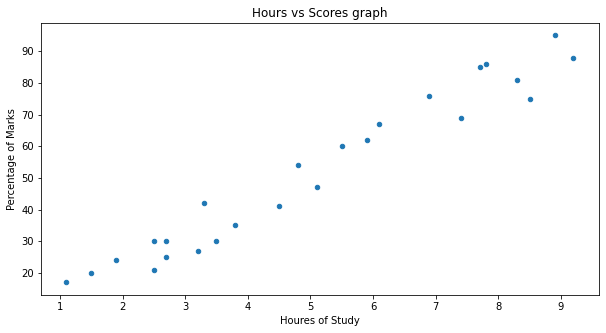

In [ ]:
#Scatterplot using pandas

Marks.plot.scatter(x='Hours',y='Scores',figsize=(10,5))
plt.xlabel('Houres of Study')
plt.ylabel('Percentage of Marks')
plt.title('Hours vs Scores graph')

In [ ]:
#Interactive scatterplot using plotly

px.scatter(Marks,'Hours','Scores')

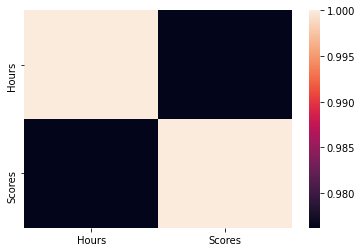

In [ ]:
#Plotting of correlational values using seaborn

sns.heatmap(Marks.corr())

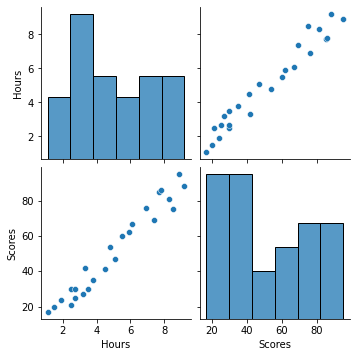

In [ ]:
#Pairplot using seaborn

sns.pairplot(Marks)

**From the above graphs,it is quite clear** **that there exists a linear relationship** **between the variables** **'Hours' and 'Scores' and they** **indeed** **possess** **a** **very** **high** **positive** **correlational** **value** **among** **themselves**.
**Hence we need to** **perform Linear Regression**.

**Now we divide the dataset into two parts** **, namely  X and y.**

In [ ]:
#Getting X in the form of a dataframe

X=Marks[['Hours']]
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
#Getting y in the form of a dataframe

y=Marks[['Scores']]
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


# **Preparation for training and testing model**

* **Importing train_test_split function from** **scikit-learn and taking 25% data** **for the purpose of testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

* **Importing Linear Regression Algorithm, creating** **instance for that and** **fitting the train dataset**

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print("Training is done")

Training is done


* **Finding the coefficient and intercept values**

In [ ]:
Coefficient=lm.coef_
print(Coefficient)

[[9.63688136]]


In [ ]:
Intercept=lm.intercept_
print(Intercept)

[2.85501017]


**So the equation of the best-fitted line obtained is** :- 
**y**=**2.85501017**+**9.63688136x**




#  **Plotting the regression line**

Text(0.5, 1.0, 'Regression plot')

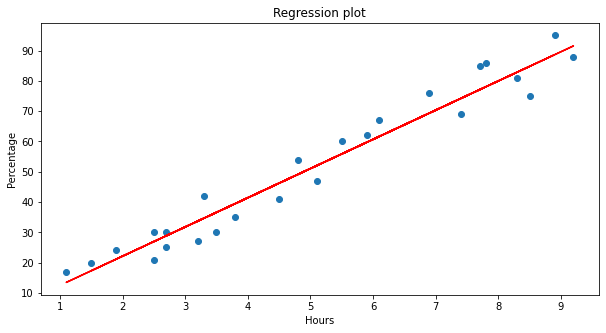

In [ ]:
plt.figure(figsize=(10,5))
line=Intercept+Coefficient*X
plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.plot(X,line,color='r')
plt.title('Regression plot')

# **Predicting the values**

In [ ]:
#Having a glimpse at X_test

X_test

,Hours
17,1.9
15,8.9
24,7.8
6,9.2
12,4.5
9,2.7
14,1.1


In [ ]:
#Having a glimpse at y_test

y_test

,Scores
17,24
15,95
24,86
6,88
12,41
9,25
14,17


In [ ]:
#Creating instance for prediction

predictions=lm.predict(X_test)
predictions

array([[21.16508475],
       [88.62325424],
       [78.02268475],
       [91.51431864],
       [46.22097627],
       [28.87458983],
       [13.45557966]])

In [ ]:
#Creating a dataframe showing comparison between the actual scores & the predicted scores

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
Marks=pd.DataFrame(X_test)
Marks['Actual Scores']=y_test
Marks['Predicted Scores']=predictions
Marks

,Hours,Actual Scores,Predicted Scores
0,1.9,24,21.165085
1,8.9,95,88.623254
2,7.8,86,78.022685
3,9.2,88,91.514319
4,4.5,41,46.220976
5,2.7,25,28.874590
6,1.1,17,13.455580


Text(0.5, 1.0, 'Predicted Scores vs Actual Scores')

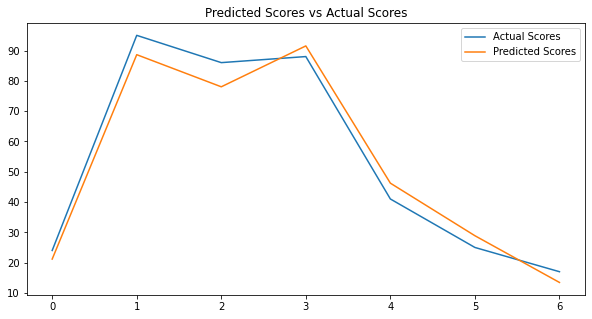

In [ ]:
#Plotting the graph of Predicted Scores vs Actual Scores

Marks.drop('Hours',axis=1).plot(figsize=(10,5))
plt.title('Predicted Scores vs Actual Scores')

* **Predicting the Score of a student if he/she studies for 9.25 Hours**

In [ ]:
hours=9.25
Hrs=np.array(hours).reshape(-1,1)
lm.predict(Hrs)

array([[91.99616271]])

**Hence the predicted marks of the student who studies for 9.25 Hours is** **91.** **99616271** **% .**

# **Evaluation of the Model**

In [ ]:
#Checking the accuracy of our model

X_test_new=X_test.drop(['Predicted Scores','Actual Scores'],axis=1)
Accuracy=lm.score(X_test_new,y_test)
print("The accuracy of our model is",Accuracy*100,"%")

The accuracy of our model is 97.48549091092109 %


In [ ]:
#Checking the measurement of error

from sklearn import metrics  
print('Mean Absolute Error:-',metrics.mean_absolute_error(y_test,predictions)) 

Mean Absolute Error:- 4.763325907990313


**Thus,we have successfully built a Linear Regression Model for getting prediction about percentage of marks based on** **hours of study.**